# Titanic Competition on kaggle

In [1247]:
import pandas as pd
test_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')

For temporary purpose we will append the train and test data after removing the survive column from train data, this will help us preprocess it faster.

In [1248]:
train_data.drop(['Name'], axis=1, inplace=True)
train_data.drop(['Ticket'], axis=1, inplace=True)
train_data.drop(['Cabin'], axis=1, inplace=True)
test_data.drop(['Name'], axis=1, inplace=True)
test_data.drop(['Ticket'], axis=1, inplace=True)
test_data.drop(['Cabin'], axis=1, inplace=True)

In [1249]:
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [1250]:
# %pip install pandas-profiling

In [1251]:
# Getting all the details of the data using PDF_REPORT
from pandas_profiling import profile_report


# profile = profile_report.ProfileReport(test_data) #minimal == true can be used to reduce the output data stream
# profile.to_file(output_file = "test_data.html")

#Insigts from report                              DECISION
1. Age is missing for some rows (263, 20%)    -  Fill with median
2. Cabin is missing for some rows (1014, 77%) - Eliminate
3. Embarked is missing for some rows(2,0.1%)  - Drop those rows
4. Fare is missing for some rows (1,0.1%)     - Drop those rows

In [1252]:
#3
train_data.dropna(subset=['Embarked'], inplace=True)
#4
train_data.dropna(subset=['Fare'], inplace=True)
#1
train_data.fillna(train_data['Age'].median(), axis=1, inplace=True)
test_data.fillna(test_data['Age'].median(), axis=1, inplace=True)
#2




In [1253]:
# embarked_fact_train = pd.get_dummies(train_data['Embarked'], prefix='Embarked')
# embarked_fact_test = pd.get_dummies(test_data['Embarked'], prefix='Embarked')

# sex_fact_train = pd.get_dummies(train_data['Sex'], prefix='Sex')

# sex_fact_test= pd.get_dummies(test_data['Sex'], prefix='Sex')


# pclass_fact_train =  pd.get_dummies(train_data['Pclass'], prefix='Pclass')
# pclass_fact_test =  pd.get_dummies(test_data['Pclass'], prefix='Pclass')
# test_data = pd.concat([test_data, embarked_fact_test, sex_fact_test,pclass_fact_test], axis=1)
# train_data = pd.concat([train_data, embarked_fact_train, sex_fact_train,pclass_fact_train], axis=1)


In [1254]:
# embarked_fact_train =    pd.DataFrame((pd.factorize(train_data['Embarked']))[0])
# embarked_fact_test =     pd.DataFrame(pd.factorize(test_data['Embarked'])[0])

# sex_fact_train =         pd.DataFrame(pd.factorize(train_data['Sex'])[0])

# sex_fact_test=           pd.DataFrame(pd.factorize(test_data['Sex'])[0])


# pclass_fact_train =      pd.DataFrame(pd.factorize(train_data['Pclass'])[0])
# pclass_fact_test =       pd.DataFrame(pd.factorize(test_data['Pclass'])[0])


In [1255]:
# train_data = pd.concat([train_data, embarked_fact_train, sex_fact_train,pclass_fact_train], axis=1)
# test_data = pd.concat([test_data, embarked_fact_test, sex_fact_test,pclass_fact_test], axis=1)

Dropping name, ticket column since it has absolutely nothing to do with the problem.

We dont also need the passengerID column since it is just a unique identifier.
and hence we have kept it here only for reference. and wont be giving it to the model.

Encoding the string objects to numeric objects.

In [1256]:

embarked_fact_train = pd.get_dummies(train_data['Embarked'], prefix='Embarked')
embarked_fact_test = pd.get_dummies(test_data['Embarked'], prefix='Embarked')

sex_fact_train = pd.get_dummies(train_data['Sex'], prefix='Sex')

sex_fact_test= pd.get_dummies(test_data['Sex'], prefix='Sex')


pclass_fact_train =  pd.get_dummies(train_data['Pclass'], prefix='Pclass')
pclass_fact_test =  pd.get_dummies(test_data['Pclass'], prefix='Pclass')
test_data = pd.concat([test_data, embarked_fact_test, sex_fact_test,pclass_fact_test], axis=1)
train_data = pd.concat([train_data, embarked_fact_train, sex_fact_train,pclass_fact_train], axis=1)


In [1257]:
train_data.drop(['Embarked', 'Sex', 'Pclass'], axis =1, inplace = True)
test_data.drop(['Embarked', 'Sex', 'Pclass'], axis =1, inplace = True)

In [1258]:
test_data

,PassengerId,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,892,34.5,0,0,7.8292,0,1,0,0,1,0,0,1
1,893,47.0,1,0,7.0000,0,0,1,1,0,0,0,1
2,894,62.0,0,0,9.6875,0,1,0,0,1,0,1,0
3,895,27.0,0,0,8.6625,0,0,1,0,1,0,0,1
4,896,22.0,1,1,12.2875,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,27.0,0,0,8.0500,0,0,1,0,1,0,0,1
414,1306,39.0,0,0,108.9000,1,0,0,1,0,1,0,0
415,1307,38.5,0,0,7.2500,0,0,1,0,1,0,0,1
416,1308,27.0,0,0,8.0500,0,0,1,0,1,0,0,1


### Now we will plot Scatter plot to check for outliers

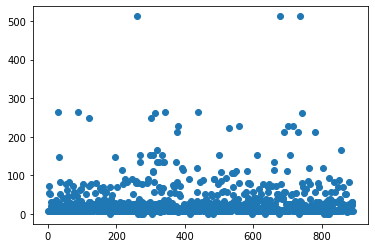

In [1259]:

import matplotlib.pyplot as plt
plt.scatter(train_data['PassengerId'], train_data['Fare'])

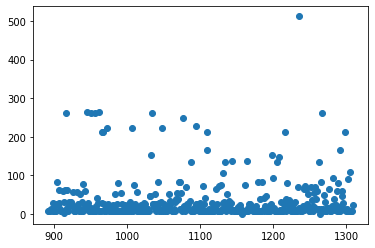

In [1260]:
plt.scatter(test_data['PassengerId'], test_data['Fare'])

From the above plot it is clear that the their are some outliers in the data.
especially in the Fare column. So we will remove the outliers from the data.

In [1261]:
train_data = train_data[train_data.Fare <400]

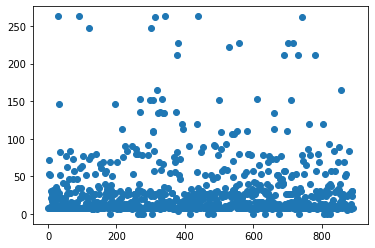

In [1262]:
plt.scatter(train_data['PassengerId'], train_data['Fare'])

Hence We have successfully removed outliers in the Fare column.

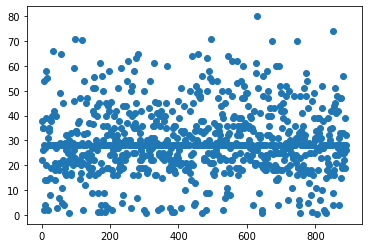

In [1263]:
plt.scatter(train_data['PassengerId'], train_data['Age'])

 from the above data it seems like there are almost no outliers in the data.

Now since there are no outliers and the data is one-hot encoded we will scale down the data using standard scaler.

In [1264]:
from sklearn.preprocessing import StandardScaler
# train_data[['Fare', 'Age']] = StandardScaler().fit_transform(train_data[['Fare', 'Age']])
# test_data[['Fare', 'Age']] = StandardScaler().fit_transform(test_data[['Fare', 'Age']])
# test_data

In [1265]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

In [1266]:
train_data.drop(['SibSp', 'Parch'], axis=1, inplace=True)
test_data.drop(['SibSp', 'Parch'], axis=1, inplace=True)

#Preprocessing Complete

Let us check the data once again.

In [1267]:
train_data

,PassengerId,Survived,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,FamilySize
0,1,0,22.0,7.2500,0,0,1,0,1,0,0,1,2
1,2,1,38.0,71.2833,1,0,0,1,0,1,0,0,2
2,3,1,26.0,7.9250,0,0,1,1,0,0,0,1,1
3,4,1,35.0,53.1000,0,0,1,1,0,1,0,0,2
4,5,0,35.0,8.0500,0,0,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.0,13.0000,0,0,1,0,1,0,1,0,1
887,888,1,19.0,30.0000,0,0,1,1,0,1,0,0,1
888,889,0,28.0,23.4500,0,0,1,1,0,0,0,1,4
889,890,1,26.0,30.0000,1,0,0,0,1,1,0,0,1


In [1268]:
# # Getting all the details of the data using PDF_REPORT
# from pandas_profiling import profile_report


# profile = profile_report.ProfileReport(test_data) #minimal == true can be used to reduce the output data stream
# profile.to_file(output_file = "test_data_processed.html")

# Building a model

In [1269]:
train_data

,PassengerId,Survived,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,FamilySize
0,1,0,22.0,7.2500,0,0,1,0,1,0,0,1,2
1,2,1,38.0,71.2833,1,0,0,1,0,1,0,0,2
2,3,1,26.0,7.9250,0,0,1,1,0,0,0,1,1
3,4,1,35.0,53.1000,0,0,1,1,0,1,0,0,2
4,5,0,35.0,8.0500,0,0,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.0,13.0000,0,0,1,0,1,0,1,0,1
887,888,1,19.0,30.0000,0,0,1,1,0,1,0,0,1
888,889,0,28.0,23.4500,0,0,1,1,0,0,0,1,4
889,890,1,26.0,30.0000,1,0,0,0,1,1,0,0,1


In [1270]:
train_x = train_data.drop(['Survived', 'PassengerId'], axis=1)
train_y = train_data['Survived']

In [1271]:
#Purposly dropping passengerid
test_ids = test_data['PassengerId']
test_data.drop(['PassengerId'], axis=1, inplace=True)




In [1272]:
train_x

,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,FamilySize
0,22.0,7.2500,0,0,1,0,1,0,0,1,2
1,38.0,71.2833,1,0,0,1,0,1,0,0,2
2,26.0,7.9250,0,0,1,1,0,0,0,1,1
3,35.0,53.1000,0,0,1,1,0,1,0,0,2
4,35.0,8.0500,0,0,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,13.0000,0,0,1,0,1,0,1,0,1
887,19.0,30.0000,0,0,1,1,0,1,0,0,1
888,28.0,23.4500,0,0,1,1,0,0,0,1,4
889,26.0,30.0000,1,0,0,0,1,1,0,0,1


In [1273]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [1274]:
train_x

,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,FamilySize
0,22.0,7.2500,0,0,1,0,1,0,0,1,2
1,38.0,71.2833,1,0,0,1,0,1,0,0,2
2,26.0,7.9250,0,0,1,1,0,0,0,1,1
3,35.0,53.1000,0,0,1,1,0,1,0,0,2
4,35.0,8.0500,0,0,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,13.0000,0,0,1,0,1,0,1,0,1
887,19.0,30.0000,0,0,1,1,0,1,0,0,1
888,28.0,23.4500,0,0,1,1,0,0,0,1,4
889,26.0,30.0000,1,0,0,0,1,1,0,0,1


In [1275]:
train_x = pd.DataFrame(StandardScaler().fit_transform(train_x))
test_data = pd.DataFrame(StandardScaler().fit_transform(test_data))

In [1276]:
test_data

,0,1,2,3,4,5,6,7,8,9,10
0,0.386231,-0.498023,-0.568142,2.843757,-1.350676,-0.755929,0.755929,-0.586559,-0.534933,0.957826,-0.553443
1,1.371370,-0.512890,-0.568142,-0.351647,0.740370,1.322876,-1.322876,-0.586559,-0.534933,0.957826,0.105643
2,2.553537,-0.464705,-0.568142,2.843757,-1.350676,-0.755929,0.755929,-0.586559,1.869391,-1.044031,-0.553443
3,-0.204852,-0.483082,-0.568142,-0.351647,0.740370,-0.755929,0.755929,-0.586559,-0.534933,0.957826,-0.553443
4,-0.598908,-0.418089,-0.568142,-0.351647,0.740370,1.322876,-1.322876,-0.586559,-0.534933,0.957826,0.764728
...,...,...,...,...,...,...,...,...,...,...,...
413,-0.204852,-0.494064,-0.568142,-0.351647,0.740370,-0.755929,0.755929,-0.586559,-0.534933,0.957826,-0.553443
414,0.740881,1.314085,1.760125,-0.351647,-1.350676,1.322876,-1.322876,1.704858,-0.534933,-1.044031,-0.553443
415,0.701476,-0.508407,-0.568142,-0.351647,0.740370,-0.755929,0.755929,-0.586559,-0.534933,0.957826,-0.553443
416,-0.204852,-0.494064,-0.568142,-0.351647,0.740370,-0.755929,0.755929,-0.586559,-0.534933,0.957826,-0.553443


In [1277]:

model =RandomForestClassifier().fit(train_x, train_y)
y_pred = model.predict(test_data) #Return the predictions


In [1278]:
Final_Df = pd.DataFrame({'PassengerId': test_ids, 'Survived': y_pred})

In [1279]:
Final_Df.to_csv('submission_RFC_SCALED', index=False)

In [1280]:
Final_Df.shape

(418, 2)